In [4]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint

In [39]:
# This is where I import the common csv files for the group
qb_stats_file = "Resources/static_data.csv"
all_qbs_file= "Resources/new_qb.csv"
qb_df=pd.read_csv(qb_stats_file)
qb_stats_df=pd.read_csv(qb_file)
all_qbs_df=pd.read_csv(all_qbs_file)

In [40]:
# This is the head of the QB Statistics
qb_stats_df.head()

,Player,player_year,season_year,Tm,Age,G,GS,Wins,Losses,Yds,TD,Y/A,Y/G,Rate,Salary
0,A.J. Feeley,1,2001,PHI,24,1,0,0,0,143,2,10.2,143.0,114.0,319325
1,A.J. Feeley,2,2002,PHI,25,6,5,4,1,1011,6,6.6,168.5,75.4,389000
2,A.J. Feeley,3,2004,MIA,27,11,8,3,5,1893,11,5.3,172.1,61.7,3455000
3,A.J. Feeley,4,2006,PHI,29,2,0,0,0,342,3,9.0,171.0,122.9,1540000
4,A.J. Feeley,5,2007,PHI,30,3,2,0,2,681,5,6.6,227.0,61.2,190588


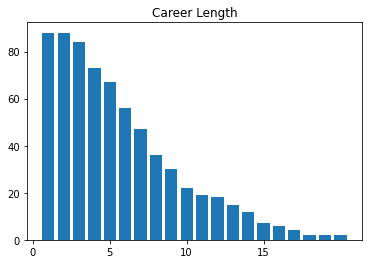

In [42]:
qb_best=qb_stats_df.groupby(qb_stats_df['player_year']).count()
x_values=qb_best.index
y_values=qb_best['Player']
plt.bar(x_values,y_values)
plt.title("Career Length")
plt.xticks(np.arange(0, 20, step=5))
plt.savefig('Output/CC_chart1.png')
plt.show()

In [43]:
# Get total number of QBs drafted from 2000 to 2015
all_qbs_df

,Year,Rnd,Pick,Player,Pos,DrAge,Tm,From,To,AP1,PB,St,wAV,G,GS,College/Univ,Unnamed: 16
0,2000,1,18,Chad Pennington,QB,24.0,NYJ,2000.0,2010.0,0,0,5,55.0,89.0,81.0,Marshall,College Stats
1,2000,3,65,Giovanni Carmazzi,QB,NaN,SFO,NaN,NaN,0,0,0,NaN,NaN,NaN,Hofstra,NaN
2,2000,3,75,Chris Redman,QB,23.0,BAL,2000.0,2011.0,0,0,0,9.0,31.0,12.0,Louisville,College Stats
3,2000,5,163,Tee Martin,QB,22.0,PIT,2001.0,2003.0,0,0,0,0.0,3.0,0.0,Tennessee,College Stats
4,2000,6,168,Marc Bulger,QB,23.0,NOR,2002.0,2009.0,0,2,8,57.0,96.0,95.0,West Virginia,College Stats
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,2015,3,75,Garrett Grayson,QB,24.0,NOR,2015.0,2015.0,0,0,0,0.0,1.0,0.0,Colorado St.,College Stats
194,2015,3,89,Sean Mannion,QB,23.0,STL,2015.0,2021.0,0,0,0,2.0,14.0,3.0,Oregon St.,College Stats
195,2015,4,103,Bryce Petty,QB,24.0,NYJ,2016.0,2017.0,0,0,0,4.0,10.0,7.0,Baylor,College Stats
196,2015,5,147,Brett Hundley,QB,22.0,GNB,2016.0,2019.0,0,0,1,5.0,18.0,9.0,UCLA,College Stats


In [10]:
#Graph the number drafted and group by round
all_qb_by_round=all_qbs_df.groupby(["Rnd"]).count()


Text(0, 0.5, 'Total QBs')

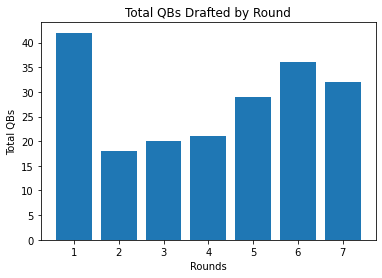

In [11]:
Round=all_qb_by_round.index
Total_per_round=all_qb_by_round['Year']
plt.bar(Round,Total_per_round)
plt.title('Total QBs Drafted by Round')
plt.xlabel('Rounds')
plt.ylabel('Total QBs')

Text(0, 0.5, 'Percentage of QBs')

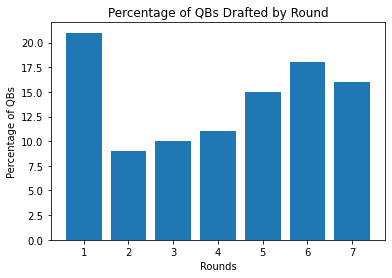

In [13]:
# get % of where QBs drafted
Round=all_qb_by_round.index
total_picks=all_qb_by_round['Year'].sum()
total_picks
Perc_by_round=round(all_qb_by_round['Year']/total_picks,2)
Perc_by_round=Perc_by_round*100
plt.bar(Round,Perc_by_round)
plt.title('Percentage of QBs Drafted by Round')
plt.xlabel('Rounds')
plt.ylabel('Percentage of QBs')


In [31]:
#Fill in all the NaN values with a 0
all_qb_df=all_qbs_df.fillna(0)
#Create DataFrame to get QBs who never played in a game
never_appeared=all_qb_df.loc[all_qb_df['G']==0,:]


42

Text(0.5, 0, 'Rounds')

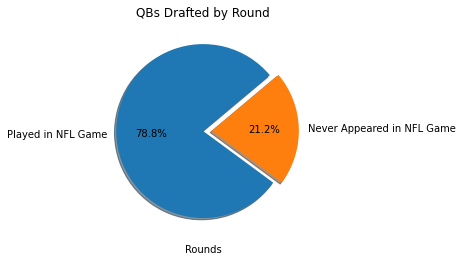

In [16]:
#Pie plot the QBs appeared vs never appeared percentage
Round=all_qb_by_round.index
total_picks=len(all_qb_df.index)
never=len(never_appeared.index)
played=total_picks-never
sizes=[played,never]
labels=['Played in NFL Game','Never Appeared in NFL Game']
explode = (0, 0.1,) 
plt.pie(sizes, labels=labels,explode=explode,shadow=True,autopct='%1.1f%%',startangle=40)
plt.title('QBs Drafted by Round')
plt.xlabel('Rounds')


Text(0.5, 0, 'Rounds')

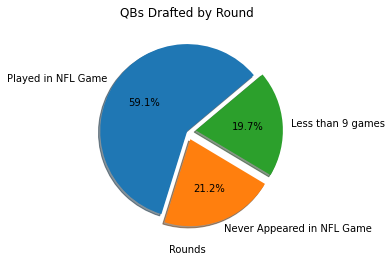

In [48]:
#Create DataFrame to get QBs who never played in a game or played less than 9
never_appeared=all_qb_df.loc[all_qb_df['G']==0,:]
non_minimum_played=all_qb_df.loc[(all_qb_df['G']>0)&(all_qb_df['G']<9)]
#Pie plot the QBs appeared vs never appeared percentage
Round=all_qb_by_round.index
total_picks=len(all_qb_df.index)
not_enough=len(non_minimum_played.index)
never=len(never_appeared.index)
played=total_picks-(never+not_enough)
sizes=[played,never,not_enough]
labels=['Played in NFL Game','Never Appeared in NFL Game','Less than 9 games']
explode = (0, 0.1,0.1) 
plt.pie(sizes, labels=labels,explode=explode,shadow=True,autopct='%1.1f%%',startangle=40)
plt.title('QBs Drafted by Round')
plt.xlabel('Rounds')

Text(0.5, 0, 'Rounds')

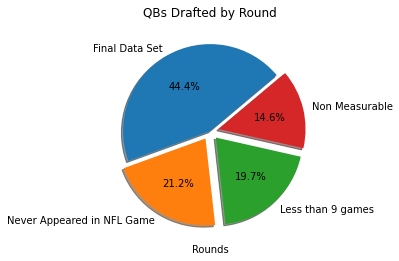

In [68]:
#minimum_played
criteria=all_qb_df.loc[all_qb_df['G']>=9]
#remove non-QBs and no salary info manually in Excel
criteria.to_csv('117.csv',index=False) #output
final88="final88.csv"
final88_df=pd.read_csv(final88)
#Replot the pie chart for final data set
final=len(final88_df)
not_enough=len(non_minimum_played.index)
never=len(never_appeared.index)
played=total_picks-(never+not_enough+non_measurable)
non_measurable=len(criteria)-final
sizes=[played,never,not_enough,non_measurable]
labels=['Final Data Set','Never Appeared in NFL Game','Less than 9 games','Non Measurable']
explode = (0, 0.1,0.1,0.1) 
plt.pie(sizes, labels=labels,explode=explode,shadow=True,autopct='%1.1f%%',startangle=40)
plt.title('QBs Drafted by Round')
plt.xlabel('Rounds')
